# Artificial networks

In [44]:
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import ConnectionPatch
from matplotlib import animation
import ipywidgets as widgets
from scipy import optimize as opt
from urllib.request import urlopen
from PIL import Image

%matplotlib inline

# Settings for the figures
plt.style.use(plt.style.available[20])
plt.style.use("https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/plots_style.txt")

# from pylab import *
from sklearn.datasets import fetch_openml

# Perceptron

### Task X

Can you implement the perceptron algorithm ?


<div>
<img src="https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/notebooks/Exc_9/static/learning_algorithm_perceptron.png" width="400"/>
</div>

MovieWriter imagemagick unavailable; using Pillow instead.


[ True False False  True False  True False  True False False  True  True
 False False  True  True  True False  True  True  True  True False  True
 False False False False  True  True False  True  True  True False False
  True  True  True  True]
[0.83484215 0.1047961  0.74464048]
(3, 40)
0
1
2
3
[-2.16515785  2.16546659  2.15897071]
[ True False False  True False  True False  True False False  True  True
 False False  True  True  True False  True  True  True  True False  True
 False False False False  True  True False  True  True  True False False
  True  True  True  True]
261 (161, 3)


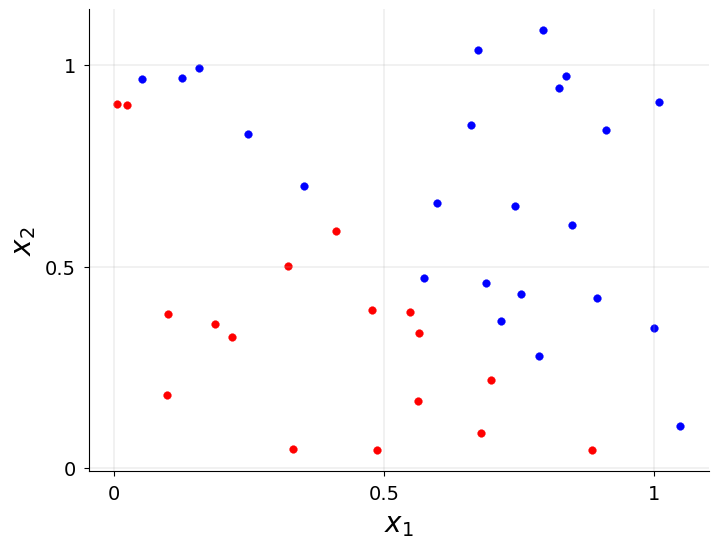

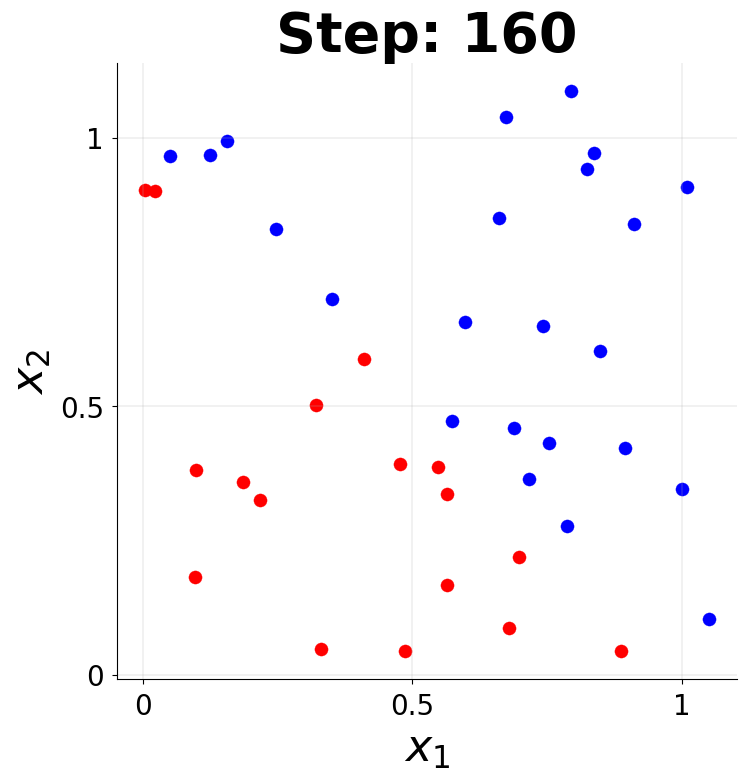

In [81]:
seed = 44

np.random.seed(10)

n_samples = 40
X = np.random.rand(2,n_samples)*1.1
labels = X[0,:] + X[1,:]  >=1
print (labels)

fig,ax = plt.subplots()
ax.scatter(*X[:,labels], color = 'b')
ax.scatter(*X[:,labels == False], color = 'r')
ax.set(
    xlabel = r'$x_1$',
    ylabel = r'$x_2$')

x_ticks = [0,0.5,1]
y_ticks = [0,0.5,1]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks,fontsize=14)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks,fontsize=14)
ax.set_xlabel('$x_1$', fontsize=20, fontweight='bold')
ax.set_ylabel('$x_2$', fontsize=20, fontweight='bold')

X = np.vstack((np.ones(n_samples), X))
np.random.seed(seed)
w = np.random.rand(3)

print (w)
print (X.shape)


all_w = w

np.random.seed(10)
converged = False
ii = 0
while not converged:
    
    print (ii)
    
    converged = True
    for x, l in zip(X.T, labels):
        if l == True and np.dot(w,x) < 0:
            w += x
            converged = False
        if l == False and np.dot(w,x) >=0:
            w -= x
            converged = False
            
        all_w = np.vstack((all_w, w))
            
    ii += 1

print (w)        

def perceptron(x, w):
    
    return np.dot(w, x) >= 0

print (perceptron(X,w))




fig,ax = plt.subplots(figsize = (8,8))

labels = perceptron(X, all_w[0,:])

data_true = ax.scatter(*X[1:,labels], color = 'b', label = 'classified as True', s=90)
data_false = ax.scatter(*X[1:,labels == False], color = 'r', label = 'classified as False', s=90)
ax.set(
    xlabel = r'$x_1$',
    ylabel = r'$x_2$')

x_ticks = [0,0.5,1]
y_ticks = [0,0.5,1]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks,fontsize=20)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks,fontsize=20)
ax.set_xlabel('$x_1$', fontsize=32, fontweight='bold')
ax.set_ylabel('$x_2$', fontsize=32, fontweight='bold')


def update(t, data_true=data_true, data_false=data_false, X=X, all_w = all_w):
    
    if t > all_w.shape[0] - 1:
        t = all_w.shape[0] - 1
        
    else:
        labels = perceptron(X, all_w[t,:])
        if np.any(labels):
            new_true_offsets = X[1:,labels]
            data_true.set_offsets(new_true_offsets.T)

        if np.any(labels == False):
            new_false_offsets = X[1:,labels == False]
            data_false.set_offsets(new_false_offsets.T)
        
    ax.set_title(f'Step: {t}', fontsize=40)
    

frames = [t for t in range(ii*n_samples+1 + 100)]

print (len(frames), all_w.shape)
# Create and render the animation
anim = animation.FuncAnimation(fig, func = update,  frames = frames )
# save it to file
anim.save(f"perceptron_seed_{seed}.gif",
          fps = 12, writer='imagemagick',dpi=300)


In [2]:
mnist = fetch_openml(name='mnist_784', as_frame = False)

In [3]:
# print(mnist.keys())
# print (mnist.target)

def to_mat(image_array):
    return image_array.reshape(28,28)

def show_example_plot(image_array, label=None):
    fig, ax = plt.subplots()
    ax.imshow(to_mat(image_array),cmap='Greys')
    if label != None:
        ax.set(
            title = f'Number {label}',
        )
    ax.axis('off')

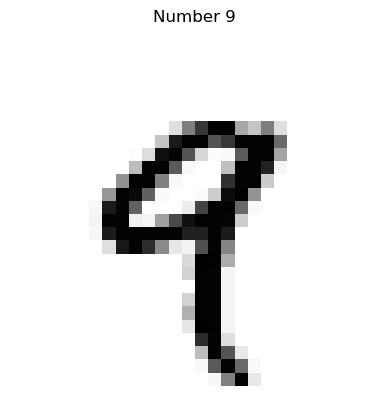

In [4]:
example_id = 4
show_example_plot(mnist.data[example_id],mnist.target[example_id])

In [5]:

# Take two rows
patterns = mnist.data
labels = mnist.target

# We need only the sign (transform to binary input)
patterns = sign(patterns/255.0 - 0.5)

# Set the number of patterns (two in out case)
n_patterns = 2

# Number of units of the network
# n = img_side*img_side

In [6]:
def show_example_plot_binary(example_ids = [0,1]):
    sqrt = np.sqrt(len(example_ids))
    rows = int(np.floor(sqrt))
    cols = int(np.ceil(sqrt))
    
    if rows * cols < len(example_ids):
        rows += 1
    
    fig, axes = plt.subplots(rows, cols,figsize=(12,12))
    ax = axes.ravel()
    for ii, ex_id in enumerate(example_ids):
        ax[ii].imshow(to_mat(patterns[ex_id]),cmap='Greys')
        ax[ii].set(
            title = f'Number {labels[ex_id]}',
        )
    for this_ax in ax:
        this_ax.axis('off')
    plt.tight_layout()

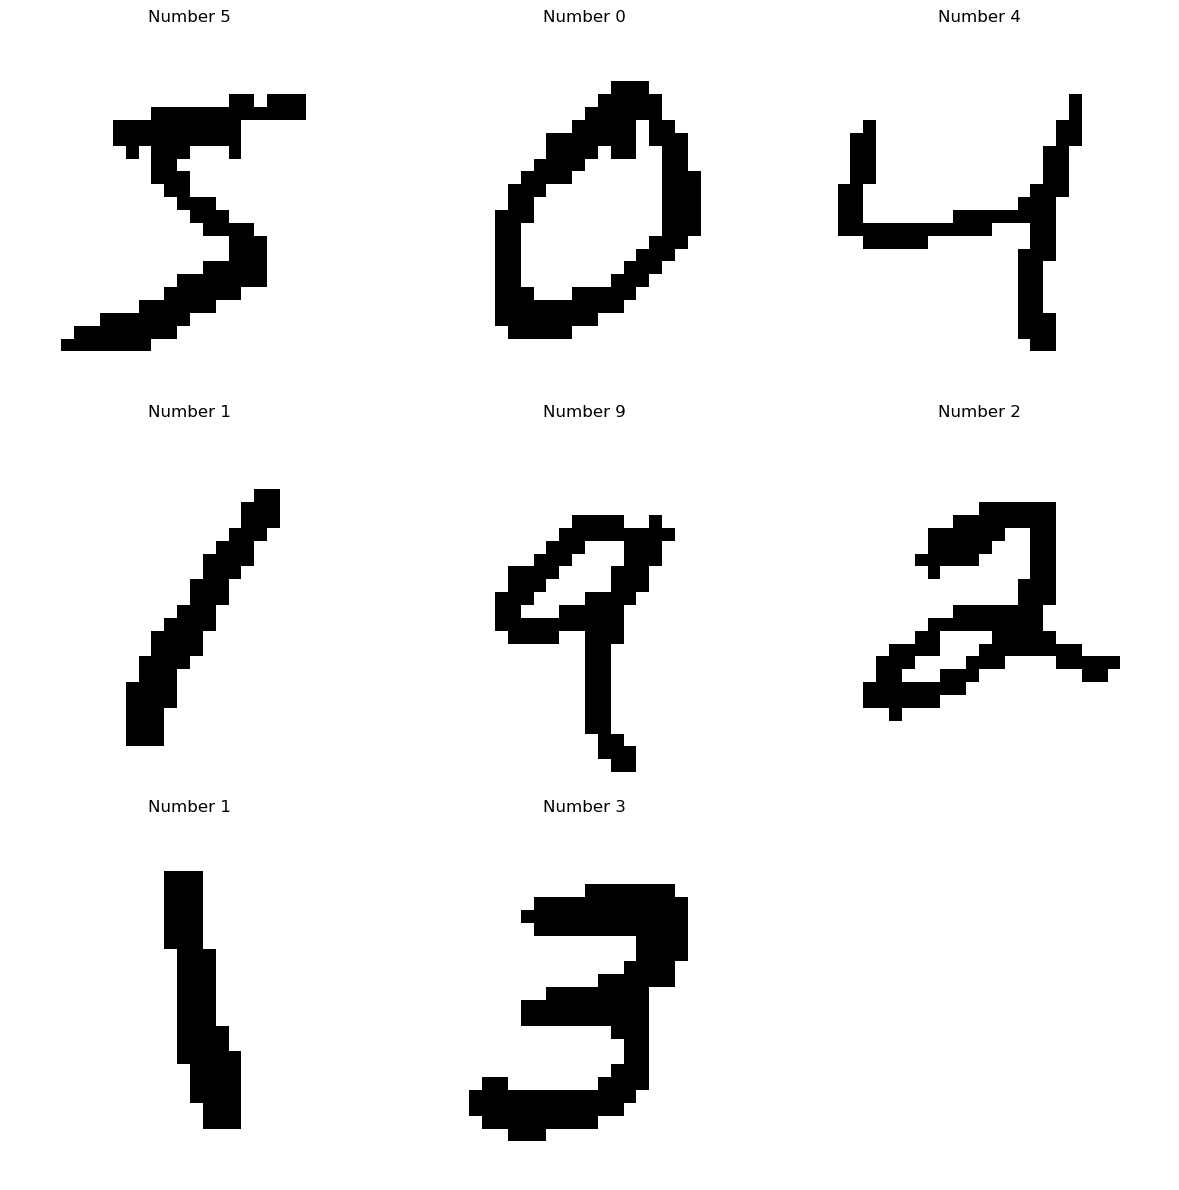

In [7]:
show_example_plot_binary([0,1,2,3,4,5,6,7])

In [ ]:
import numpy as np
from PIL import Image
import requests
from io import BytesIO

url = '...'
response = requests.get(url)
img = Image.open(BytesIO(response.content))



In [9]:
# The matplotlib object to do animations
from matplotlib import animation
import numpy as np


class HopfieldNetwork(object):
    """docstring for HopfieldNetwork

    patterns: np.array with shape (n_of_patterns, dim_of_patterns)
    """

    def __init__(self, 
        training_patterns,
        training_labels,
        store_overlap_with_training_data=False):
        super(HopfieldNetwork, self).__init__()

        self.training_patterns = training_patterns
        self.training_labels = training_labels

        self.n_training_patterns = self.training_patterns.shape[0]
        self.dim_patterns = self.training_patterns.shape[1]
        self.init_network()

        self.current_target_pattern = self.training_patterns[0]
        self.current_target_label = self.training_labels[0]

        self.store_overlap_with_training_data = store_overlap_with_training_data

    def init_network(self):
        # Initialize weights to zero values
        self.W = zeros([self.dim_patterns, self.dim_patterns])

    def train(self):
        # Accumulate outer products
        for pattern in self.training_patterns:
            self.W += np.outer(pattern, pattern)

        # Divide times the number of patterns
        self.W /= float(self.n_training_patterns)

        # Exclude the autoconnections
        self.W *= 1.0 - eye(self.dim_patterns)

    def run_simuation(
        self,
        noise=0.2,  # 0 = no noise, 1 = only noise
        sim_time=1500,  # timesteps
        frames_to_save=100,
        target_pattern = np.array([]),
        target_label = None,
        save_simulation = True,
        synchrounous_update = False,
    ):
        if target_pattern.size != 0:
            self.current_target_pattern = target_pattern
            self.current_target_label = target_label



        # store data at each sampling interval
        sample_interval = sim_time // frames_to_save

        self.store_images = np.zeros([self.dim_patterns, frames_to_save])
        self.store_energy = np.zeros(frames_to_save)

        x = self.current_target_pattern.copy()

        # We randomly perturb the initial image by swapping the values
        mask = np.sign(np.random.random(self.dim_patterns) - noise)
        random_array = np.sign(np.random.random(self.dim_patterns)-0.5)
        x[mask == -1] = random_array[mask == -1]

        # During the iterations we ranomly select a unit to update
        x_indices = np.arange(self.dim_patterns)
        np.random.shuffle(x_indices)


        # the iterations
        for tt in range(sim_time):

            if synchrounous_update:
                x = sign(np.dot(self.W,x))
            else:
                # get a random index 
                current_x = x_indices[tt % self.dim_patterns]
                # Activation of a unit
                x[current_x] = sign(np.dot(self.W[current_x, :], x))


            # Store current activations
            if sim_time % sample_interval == 0:
                # Energy of the current state of the network
                self.store_energy[tt // sample_interval] = -0.5 * np.dot(x, np.dot(self.W, x))

                # array containing frames_to_save of network activation
                self.store_images[:, tt // sample_interval] = x


                if self.store_overlap_with_training_data:
                    print (np.sum(self.training_patterns == x,axis=1)/self.training_patterns.shape[1])
                    # self.overlap_with_training_data[tt//sample_interval] = a


        print ('simulation finished')

        if save_simulation:
            self.save_simulation()

    def init_figure(self):

        fig, ax = plt.subplots(2,2, figsize=(10,10))

        # Plot 1 - showing the target digit
        # Create subplot
        ax1 = ax[0,0]
        ax1.set_title("Target")
        # Create the imshow and save the handler
        im_target = display_image(ax1, self.current_target_pattern) 

        # Plot 2 - plot the state of the network

        # Create subplot
        ax2 = ax[0,1]
        ax2.set_title("Recalling")

        # Create the imshow and save the handler
        im_activation = display_image(ax2, self.store_images[:,0]) 


        # Plot 3 - plot the history of the energy
        # Create subplot
        ax3 = ax[1,1]

        ax3.set_title("Energy")

        # Create the line plot and save the handler
        im_energy, = ax3.plot(self.store_energy) # the comma after im_energy is important (line plots are returned in lists)

        # style
        ax3.spines['top'].set_visible(False)
        ax3.spines['right'].set_visible(False)
        ax3.set_xticks([])
        ax3.set_yticks([])   


        ax4 = ax[1,0]
        ax4.set_title("Errors")

        # Create the imshow and save the handler
        im_errors = display_image(ax4, self.store_images[:,0]+ self.current_target_pattern * -1, cmap='bwr') 
        
        # return plot handlers
        return fig, im_target, im_activation, im_energy, im_errors


    def save_simulation(self):

    
        fig, im_target, im_activation, im_energy, im_errors = self.init_figure()
        
        frames = [t for t in range(self.store_images.shape[1])]

        def update(t,
            im_activation=im_activation, 
            im_energy=im_energy,
            im_errors=im_errors,) :
            
            
            A = np.squeeze(self.store_images[:,t])
            im_activation.set_array(to_mat(A))
            im_errors.set_array(to_mat(A + self.current_target_pattern*-1)) 
            im_energy.set_data(np.arange(t), self.store_energy[:t]) 


        # Create and render the animation
        anim = animation.FuncAnimation(fig, func = update,  frames = frames )
        # save it to file
        anim.save(f"mnist-hopfield_{self.current_target_label}.gif",
                  fps = 10, writer='imagemagick',dpi=50)



def to_mat(pattern):
    return pattern.reshape(28,28)

def display_image(ax, img_array,cmap=cm.binary):
    im = ax.imshow(to_mat(img_array), 
                interpolation = 'none', 
                aspect = 'auto',
                cmap = cmap) 
    ax.axis('off')
    return im

In [10]:
test_network = HopfieldNetwork(
    training_patterns = patterns[[0,1]],
    training_labels = labels[[0,1]])

In [11]:
test_network.train()

MovieWriter imagemagick unavailable; using Pillow instead.


simulation finished


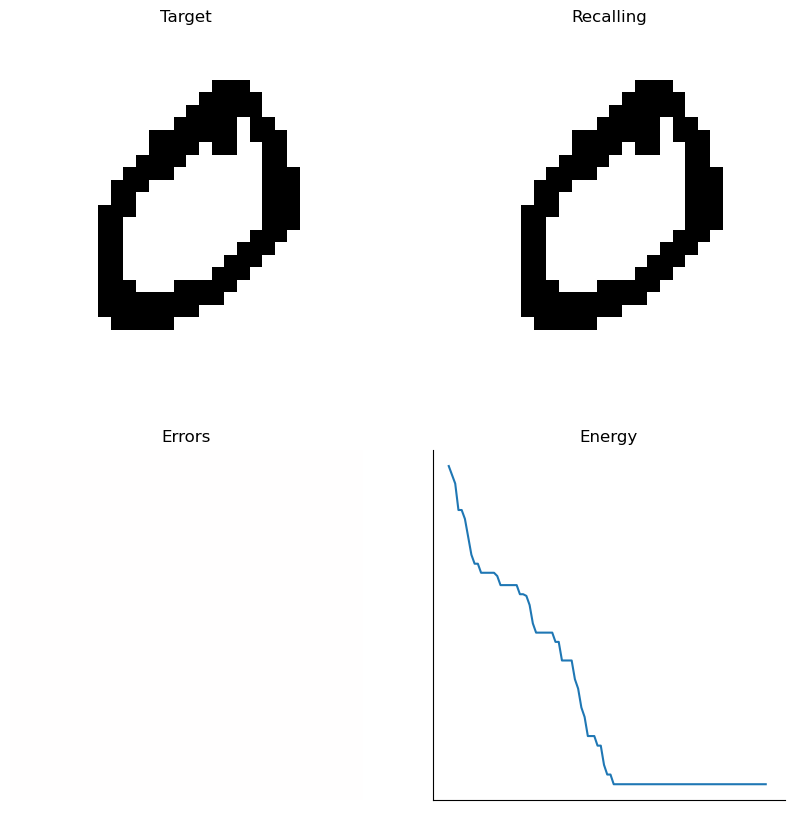

In [12]:
test_network.run_simuation(
    noise=0.1,
    target_pattern=patterns[1],
    target_label=labels[1])

In [13]:
def pca(X):
  """
  Performs PCA on multivariate data. Eigenvalues are sorted in decreasing order

  Args:
     X (numpy array of floats) :   Data matrix each column corresponds to a
                                   different random variable

  Returns:
    (numpy array of floats)    : Data projected onto the new basis
    (numpy array of floats)    : Corresponding matrix of eigenvectors
    (numpy array of floats)    : Vector of eigenvalues

  """

  X = X - np.mean(X, 0)
  cov_matrix = get_sample_cov_matrix(X)
  evals, evectors = np.linalg.eigh(cov_matrix)
  evals, evectors = sort_evals_descending(evals, evectors)
  score = change_of_basis(X, evectors)

  return score, evectors, evals

def get_sample_cov_matrix(X):
  """
  Returns the sample covariance matrix of data X.

  Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable

  Returns:
    (numpy array of floats)   : Covariance matrix
"""

  X = X - np.mean(X, 0)
  cov_matrix = 1 / X.shape[0] * np.matmul(X.T, X)
  return cov_matrix

def sort_evals_descending(evals, evectors):
  """
  Sorts eigenvalues and eigenvectors in decreasing order. Also aligns first two
  eigenvectors to be in first two quadrants (if 2D).

  Args:
    evals (numpy array of floats)    :   Vector of eigenvalues
    evectors (numpy array of floats) :   Corresponding matrix of eigenvectors
                                         each column corresponds to a different
                                         eigenvalue

  Returns:
    (numpy array of floats)          : Vector of eigenvalues after sorting
    (numpy array of floats)          : Matrix of eigenvectors after sorting
  """

  index = np.flip(np.argsort(evals))
  evals = evals[index]
  evectors = evectors[:, index]
  if evals.shape[0] == 2:
    if np.arccos(np.matmul(evectors[:, 0],
                           1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
      evectors[:, 0] = -evectors[:, 0]
    if np.arccos(np.matmul(evectors[:, 1],
                           1 / np.sqrt(2)*np.array([-1, 1]))) > np.pi / 2:
      evectors[:, 1] = -evectors[:, 1]

  return evals, evectors

def change_of_basis(X, W):
  """
  Projects data onto a new basis.

  Args:
    X (numpy array of floats) : Data matrix each column corresponding to a
                                different random variable
    W (numpy array of floats) : new orthonormal basis columns correspond to
                                basis vectors

  Returns:
    (numpy array of floats)   : Data matrix expressed in new basis
  """

  Y = np.matmul(X, W)

  return Y

(7877, 784)
(6990, 784)
(7141, 784)
(6824, 784)
(6313, 784)
(6876, 784)
(7293, 784)
(6825, 784)
(6958, 784)


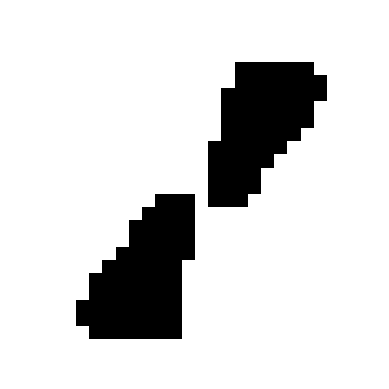

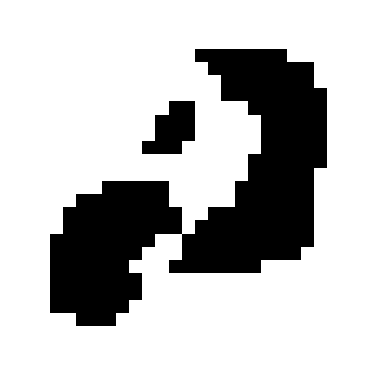

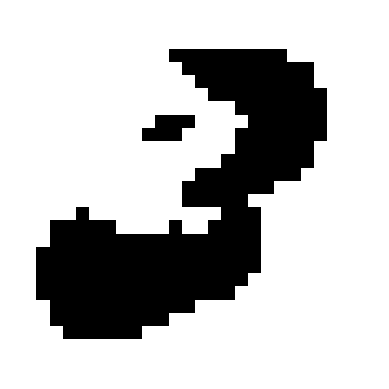

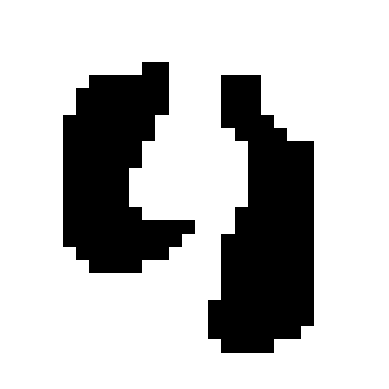

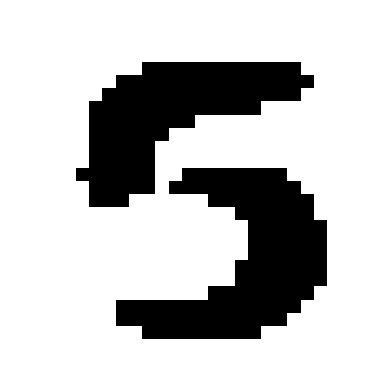

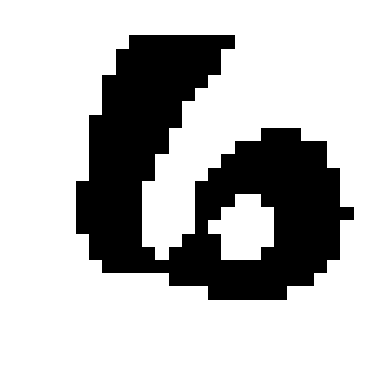

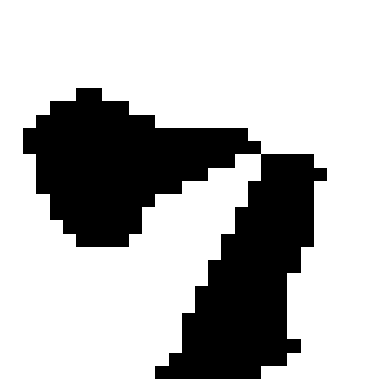

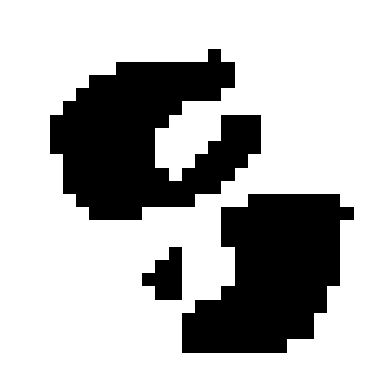

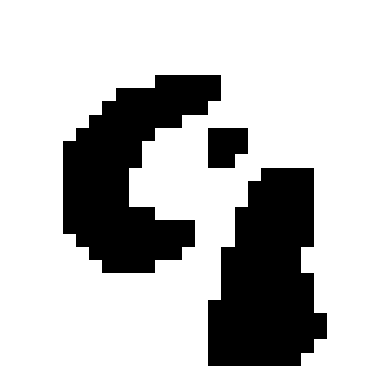

In [14]:


training_data = []
for ii in range(1,10):
    numbers = patterns[labels==f'{ii}']
    print (numbers.shape)
    score, evectors, evals = pca(numbers)
    
    X = evectors[:, 0]
    Y = np.sign(X-np.mean(X))
    if np.sum(Y) > 0:
        Y *= -1
    show_example_plot(Y)
    training_data.append(Y)

In [15]:
test_network = HopfieldNetwork(
    training_patterns = np.array(training_data),
    training_labels = range(1,10),
    store_overlap_with_training_data=True,
)
test_network.train()

[0.7372449  0.69260204 0.65561224 0.70663265 0.67091837 0.65306122
 0.69387755 0.6505102  0.69387755]
[0.73596939 0.69132653 0.65433673 0.70790816 0.67219388 0.65433673
 0.69515306 0.65178571 0.69515306]
[0.73596939 0.69132653 0.65433673 0.70790816 0.67219388 0.65433673
 0.69515306 0.65178571 0.69515306]
[0.73596939 0.69132653 0.65433673 0.70790816 0.67219388 0.65433673
 0.69515306 0.65178571 0.69515306]
[0.73596939 0.69132653 0.65433673 0.70790816 0.67219388 0.65433673
 0.69515306 0.65178571 0.69515306]
[0.73596939 0.69132653 0.65433673 0.70790816 0.67219388 0.65433673
 0.69515306 0.65178571 0.69515306]
[0.73596939 0.69132653 0.65433673 0.70790816 0.67219388 0.65433673
 0.69515306 0.65178571 0.69515306]
[0.73596939 0.69132653 0.65433673 0.70790816 0.67219388 0.65433673
 0.69515306 0.65178571 0.69515306]
[0.73596939 0.69132653 0.65433673 0.70790816 0.67219388 0.65433673
 0.69515306 0.65178571 0.69515306]
[0.73596939 0.69132653 0.65433673 0.70790816 0.67219388 0.65433673
 0.69515306 0.6

[0.72321429 0.72193878 0.66454082 0.80229592 0.74872449 0.74362245
 0.75382653 0.72321429 0.78954082]
[0.72321429 0.72193878 0.66454082 0.80229592 0.74872449 0.74362245
 0.75382653 0.72321429 0.78954082]
[0.72321429 0.72193878 0.66454082 0.80229592 0.74872449 0.74362245
 0.75382653 0.72321429 0.78954082]
[0.72321429 0.72193878 0.66454082 0.80229592 0.74872449 0.74362245
 0.75382653 0.72321429 0.78954082]
[0.72321429 0.72193878 0.66454082 0.80229592 0.74872449 0.74362245
 0.75382653 0.72321429 0.78954082]
[0.72321429 0.72193878 0.66454082 0.80229592 0.74872449 0.74362245
 0.75382653 0.72321429 0.78954082]
[0.72321429 0.72193878 0.66454082 0.80229592 0.74872449 0.74362245
 0.75382653 0.72321429 0.78954082]
[0.7244898  0.72321429 0.66326531 0.80357143 0.74744898 0.74489796
 0.75510204 0.72193878 0.78826531]
[0.72576531 0.7244898  0.66454082 0.80484694 0.74872449 0.74362245
 0.75382653 0.72066327 0.7869898 ]
[0.72576531 0.7244898  0.66454082 0.80484694 0.74872449 0.74362245
 0.75382653 0.7

[0.69642857 0.76147959 0.68112245 0.90306122 0.82142857 0.81632653
 0.80867347 0.78316327 0.88520408]
[0.69642857 0.76147959 0.68112245 0.90306122 0.82142857 0.81632653
 0.80867347 0.78316327 0.88520408]
[0.69515306 0.76020408 0.67984694 0.90433673 0.82015306 0.81760204
 0.80994898 0.78443878 0.88647959]
[0.69387755 0.75892857 0.67857143 0.90561224 0.82142857 0.81887755
 0.81122449 0.78571429 0.8877551 ]
[0.69387755 0.75892857 0.67857143 0.90561224 0.82142857 0.81887755
 0.81122449 0.78571429 0.8877551 ]
[0.69387755 0.75892857 0.67857143 0.90561224 0.82142857 0.81887755
 0.81122449 0.78571429 0.8877551 ]
[0.69387755 0.75892857 0.67857143 0.90561224 0.82142857 0.81887755
 0.81122449 0.78571429 0.8877551 ]
[0.69387755 0.75892857 0.67857143 0.90561224 0.82142857 0.81887755
 0.81122449 0.78571429 0.8877551 ]
[0.69387755 0.75892857 0.67857143 0.90561224 0.82142857 0.81887755
 0.81122449 0.78571429 0.8877551 ]
[0.69260204 0.76020408 0.67984694 0.90688776 0.82015306 0.82015306
 0.8125     0.7

[0.66964286 0.75       0.65943878 0.93494898 0.82015306 0.82015306
 0.82780612 0.80229592 0.90688776]
[0.66964286 0.75       0.65943878 0.93494898 0.82015306 0.82015306
 0.82780612 0.80229592 0.90688776]
[0.66964286 0.75       0.65943878 0.93494898 0.82015306 0.82015306
 0.82780612 0.80229592 0.90688776]
[0.66964286 0.75       0.65943878 0.93494898 0.82015306 0.82015306
 0.82780612 0.80229592 0.90688776]
[0.66964286 0.75       0.65943878 0.93494898 0.82015306 0.82015306
 0.82780612 0.80229592 0.90688776]
[0.66964286 0.75       0.65943878 0.93494898 0.82015306 0.82015306
 0.82780612 0.80229592 0.90688776]
[0.66964286 0.75       0.65943878 0.93494898 0.82015306 0.82015306
 0.82780612 0.80229592 0.90688776]
[0.66964286 0.75       0.65943878 0.93494898 0.82015306 0.82015306
 0.82780612 0.80229592 0.90688776]
[0.66964286 0.75       0.65943878 0.93494898 0.82015306 0.82015306
 0.82780612 0.80229592 0.90688776]
[0.66964286 0.75       0.65943878 0.93494898 0.82015306 0.82015306
 0.82780612 0.8

MovieWriter imagemagick unavailable; using Pillow instead.


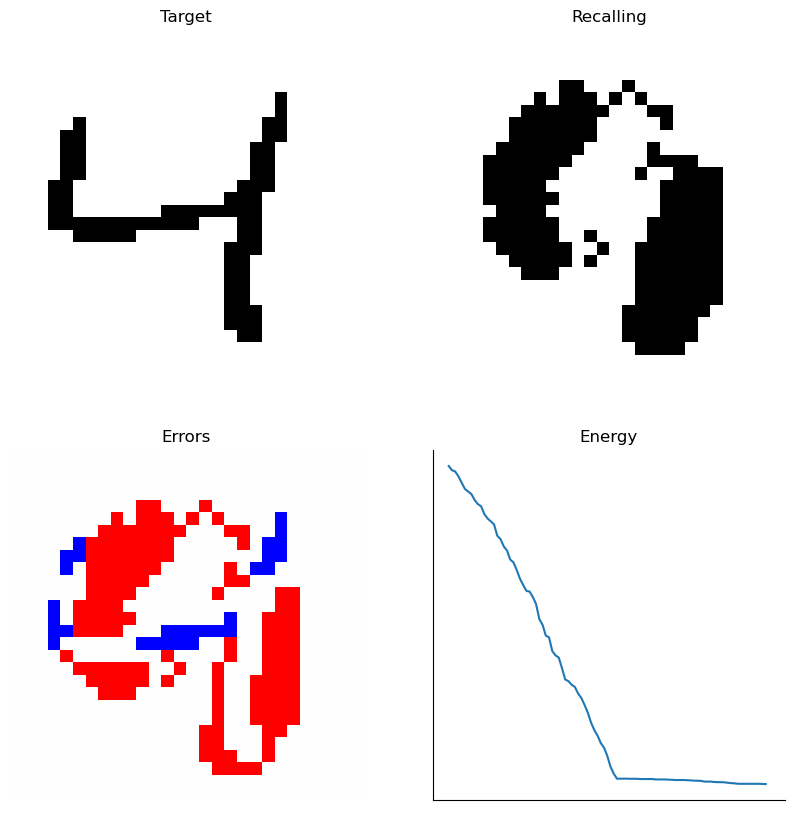

In [16]:
test_network.run_simuation(
    noise=0.2,
    target_pattern=patterns[2],
    target_label=labels[2],
    synchrounous_update=False)